In [17]:
#1. Install Tesseract and Required Libraries
!apt-get install -y tesseract-ocr
!pip install pytesseract
!pip install opencv-python-headless


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [16]:
#2. Import Libraries
import cv2
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow
from google.colab import files
import os


In [35]:
#3. Upload an Image from Your PC
uploaded = files.upload()  # You will be prompted to upload a file

# Get the uploaded file name
image_path = next(iter(uploaded))


Saving ocr_handwriting_reco_adrian_sample.jpg to ocr_handwriting_reco_adrian_sample (2).jpg



Original Image:


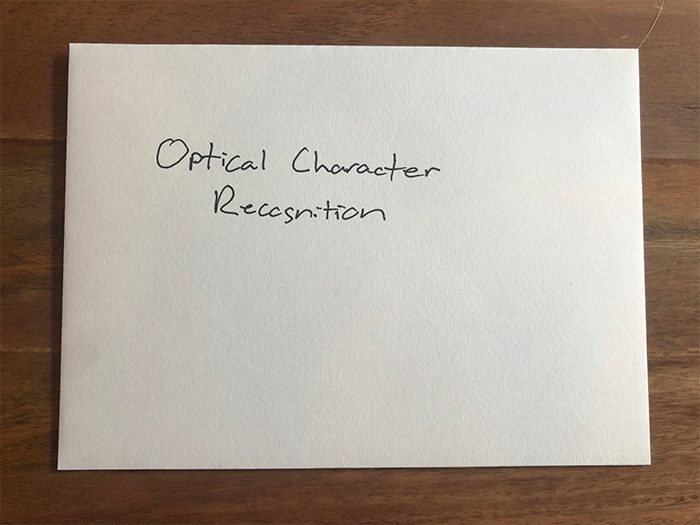

In [36]:
# 4. Read the Uploaded Image

image = cv2.imread(image_path)

if image is None:
    print(f"Error: Unable to read the image file: {image_path}")
else:
    print("\nOriginal Image:")
    cv2_imshow(image)


In [37]:
# 5. Define the Helper Functions
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return thresh

def detect_text_regions(preprocessed_image):
    contours, _ = cv2.findContours(preprocessed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boxes = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if w > 30 and h > 10:
            boxes.append((x, y, w, h))
    return boxes

def draw_bounding_boxes(image, boxes):
    img_copy = image.copy()
    for (x, y, w, h) in boxes:
        cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return img_copy

def get_detected_text(boxes, image=image):
    text = ""
    for (x, y, w, h) in boxes:
        roi = image[y:y+h, x:x+w]
        roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        roi_thresh = cv2.threshold(roi_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
        text_piece = pytesseract.image_to_string(roi_thresh)
        text += text_piece.strip() + "\n"
    return text



Image with Text Detection Regions:


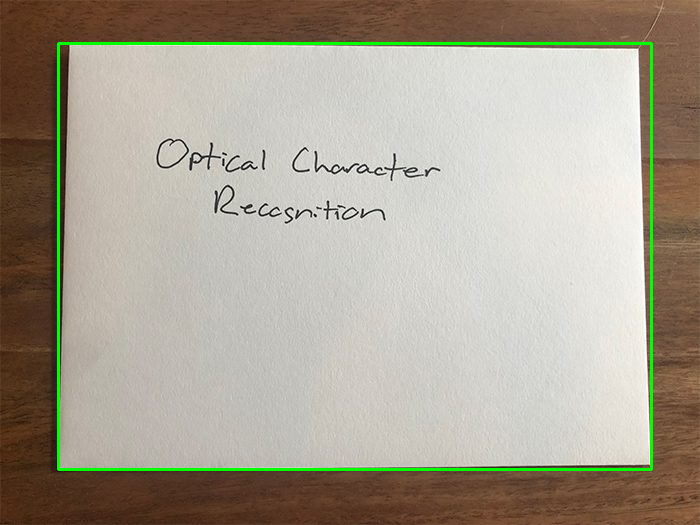


Detected Text:
Optical Chevacher

Reco sneer



In [38]:
# 6. Run Text Detection and Display Results

preprocessed = preprocess_image(image)
boxes = detect_text_regions(preprocessed)
image_with_boxes = draw_bounding_boxes(image, boxes)

print("\nImage with Text Detection Regions:")
cv2_imshow(image_with_boxes)

detected_text = get_detected_text(boxes, image)
print("\nDetected Text:")
print(detected_text)


